Importamos nuestras librerias

In [5]:
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np


In [6]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Queremos saber el numero de filas y columnas

In [10]:
df.shape

(891, 12)

Limpieza de datos, saber los datos con los que podemos tratar

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Queremos solo el  resumen de columnas

In [12]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

No podemos trabajar con datos nulos.  Debemos rellenar o descartar los datos que NO interesan o no están.  Vamos a dar datos neutros a Edad y Cabin

In [13]:
df = df.fillna({"Age": 0, "Cabin": "None"})
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       889
dtype: int64

Agrupar por Generos

In [15]:
df_generos = df.groupby("Sex")
df_generos.describe()

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    314.0  0.742038  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                          
              25%   50%    75%       max  
Sex                                       
female  12.071875  23.0  55.00  512.3292  
male     7.895800  10.5  26.55  512.3292  

[2 rows x 56 columns]

Vamos recuperar los datos de los pasajeros supervivientes y fallecidos y totales

In [16]:
pasajeros = df.shape[0]
supervivientes = df[df['Survived'] == 1]
num_survived = supervivientes.shape[0]
fallecidos = pasajeros - num_survived

Hacemos una serie para los datos

In [17]:
data = {
    "Datos": ["totales", "supervientes", "fallecidos"],
    "Values": [pasajeros, num_survived, fallecidos]
}
df_data = pd.DataFrame(data)
df_data

,Datos,Values
0,totales,891
1,supervientes,342
2,fallecidos,549


Codigo para el gráfico

In [18]:
import matplotlib.pyplot as plt

<Axes: ylabel='Values'>

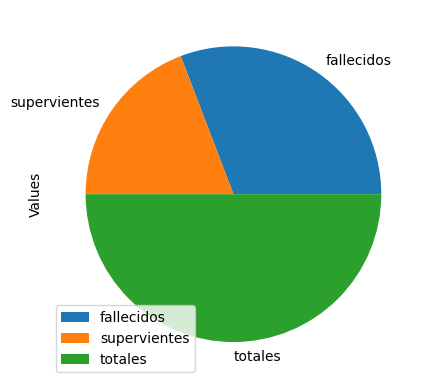

In [19]:
df_grafico = df_data.groupby("Datos").sum()
df_grafico.plot(kind='pie', y="Values")